# Base Agent based on LangGraph

## Base Chatbot

In [5]:
from langchain_openai import ChatOpenAI
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_teddynote.graphs import visualize_graph

In [6]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [7]:
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("Base-agent")

LangSmith 추적을 시작합니다.
[프로젝트명]
Base-agent


In [8]:
# STEP 1: State 정의
class PaperState(TypedDict):
    messages: Annotated[list, add_messages]

In [12]:
# STEP 2: Node 정의
# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# 챗봇 함수 정의
def chatbot(state: PaperState):
    # 메시지 호출 및 반환
    answer = llm.invoke(state["messages"])
    state["messages"].append(answer)
    return state

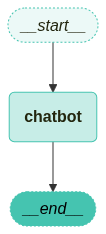

In [13]:
# STEP 3: Graph 정의 및 Node 추가
graph_builder = StateGraph(PaperState)

graph_builder.add_node("chatbot", chatbot)

# STEP 4: Edge 추가
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# STEP 5: Graph 컴파일
graph = graph_builder.compile()

# STEP 6: Graph 시각화
visualize_graph(graph)

In [14]:
question = "서울의 유명한 맛집 TOP 3 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: 서울에는 맛있는 음식이 가득한 유명한 맛집들이 많습니다. 그 중에서 TOP 3를 추천해드릴게요.

1. **광장시장** - 전통 시장인 광장시장은 다양한 한국 전통 음식을 맛볼 수 있는 곳입니다. 특히, 빈대떡과 마약김밥이 유명합니다. 시장의 활기찬 분위기 속에서 다양한 먹거리를 즐길 수 있습니다.

2. **이태원 부대찌개** - 이태원에 위치한 부대찌개 전문점은 한국식 부대찌개의 원조로 알려져 있습니다. 푸짐한 재료와 깊은 국물 맛이 일품이며, 다양한 사이드 메뉴도 함께 즐길 수 있습니다.

3. **삼청동 수제비** - 삼청동에 위치한 이곳은 수제비와 칼국수가 유명한 맛집입니다. 신선한 재료로 만든 수제비는 쫄깃하고 국물은 진한 맛이 특징입니다. 아늑한 분위기에서 편안하게 식사를 즐길 수 있습니다.

이 외에도 서울에는 많은 맛집이 있으니, 다양한 음식을 즐겨보세요!


### 정리

LangSmith 추적을 시작합니다.
[프로젝트명]
Base-agent


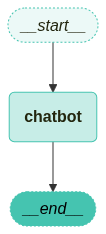

a:  [HumanMessage(content='서울의 유명한 맛집 TOP 3 추천해줘', additional_kwargs={}, response_metadata={}, id='326ca0c7-2a57-45e0-94a1-576feb2bf261')]
b:  [HumanMessage(content='서울의 유명한 맛집 TOP 3 추천해줘', additional_kwargs={}, response_metadata={}, id='326ca0c7-2a57-45e0-94a1-576feb2bf261'), AIMessage(content='서울에는 맛있는 음식점이 정말 많습니다! 그 중에서 유명한 맛집 TOP 3를 추천해드릴게요.\n\n1. **광장시장** - 이곳은 다양한 전통 음식을 맛볼 수 있는 시장입니다. 특히 빈대떡과 마약김밥이 유명합니다. 시장의 활기찬 분위기 속에서 다양한 먹거리를 즐길 수 있습니다.\n\n2. **이태원 부대찌개** - 이태원에 위치한 부대찌개 전문점으로, 푸짐한 양과 깊은 맛이 특징입니다. 다양한 재료가 들어간 부대찌개는 한국식 퓨전 요리의 대표적인 예로, 외국인 관광객들에게도 인기가 많습니다.\n\n3. **삼청동 수제비** - 삼청동에 위치한 이곳은 수제비와 칼국수가 유명한 집입니다. 신선한 재료로 만든 수제비는 쫄깃하고 국물 맛이 깊어 많은 사람들에게 사랑받고 있습니다.\n\n이 외에도 서울에는 많은 맛집이 있으니, 다양한 음식을 즐겨보세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 244, 'prompt_tokens': 19, 'total_tokens': 263, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 

In [16]:
# 필요한 라이브러리 임포트
from langchain_openai import ChatOpenAI
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_teddynote.graphs import visualize_graph

from dotenv import load_dotenv  # 환경변수(.env) 파일 로드용
from langchain_teddynote import logging

# STEP 0: 환경설정 및 로깅
load_dotenv()  # .env 파일의 환경변수 불러오기
logging.langsmith("Base-agent")  # LangSmith 프로젝트 이름 설정


# STEP 1: 상태(State) 정의
class PaperState(TypedDict):
    # messages: 대화 메시지 리스트를 저장 (add_messages로 타입 어노테이션)
    messages: Annotated[list, add_messages]


# STEP 2: 노드(Node) 정의
# LLM(언어모델) 인스턴스 생성
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# 챗봇 노드 함수 정의
def chatbot(state: PaperState):
    # 현재까지의 메시지 출력 (디버깅용)
    print("a: ", state["messages"])
    # LLM을 호출하여 답변 생성
    answer = llm.invoke(state["messages"])
    # 답변을 메시지 리스트에 추가
    state["messages"].append(answer)
    # 답변 추가 후 메시지 출력 (디버깅용)
    print("b: ", state["messages"])
    # 상태 반환
    return state


# STEP 3: 그래프(Graph) 정의 및 노드 추가
graph_builder = StateGraph(PaperState)  # 상태 타입을 지정하여 그래프 빌더 생성
graph_builder.add_node("chatbot", chatbot)  # "chatbot" 노드 추가

# STEP 4: 엣지(Edge) 추가
graph_builder.add_edge(START, "chatbot")  # 시작점 → 챗봇 노드
graph_builder.add_edge("chatbot", END)  # 챗봇 노드 → 종료점

# STEP 5: 그래프 컴파일
graph = graph_builder.compile()

# STEP 6: 그래프 시각화 (노드와 엣지 구조를 이미지로 확인 가능)
visualize_graph(graph)

# STEP 7: 그래프 실행
question = "서울의 유명한 맛집 TOP 3 추천해줘"

# 그래프 실행 및 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 각 이벤트에서 생성된 메시지 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)